In [1]:
%config Completer.use_jedi = False

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns 
import collections

In [3]:
H=nx.read_gml('Author_keywords707.gml')

In [5]:
H.number_of_nodes()

707

In [6]:
H.number_of_edges()

1851

# Communities detection algorithm on network 

## Greedy modularity communities

In [7]:
from networkx.algorithms.community import greedy_modularity_communities

In [8]:
c = greedy_modularity_communities(H)

In [9]:
len(c)

26

In [10]:
[len(i) for i in c]

[199,
 192,
 78,
 46,
 36,
 22,
 21,
 20,
 12,
 12,
 9,
 7,
 7,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2]

In [11]:
c = greedy_modularity_communities(H,weight='efreq')

In [12]:
len(c)

27

In [30]:
[len(i) for i in c]

[37,
 32,
 30,
 29,
 27,
 25,
 24,
 21,
 20,
 20,
 20,
 19,
 19,
 18,
 18,
 18,
 17,
 16,
 15,
 15,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 4,
 4,
 3,
 3]

In [33]:
c = greedy_modularity_communities(H,weight='efreq',resolution=4)

In [34]:
len(c)

44

In [37]:
j=0
step=[]
for i in range(20):
    j+=0.25
    step.append(j)

In [41]:
test=[]
for i,j in enumerate(step):
    c = greedy_modularity_communities(H,weight='efreq',resolution=j)
    test.append(len(c))

In [42]:
x=[i+1 for i in range(20)]

/home/sunny/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

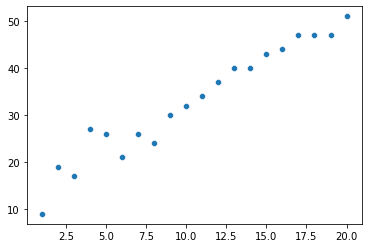

In [44]:
sns.scatterplot(x,test)

In [45]:
import matplotlib.pyplot as plt

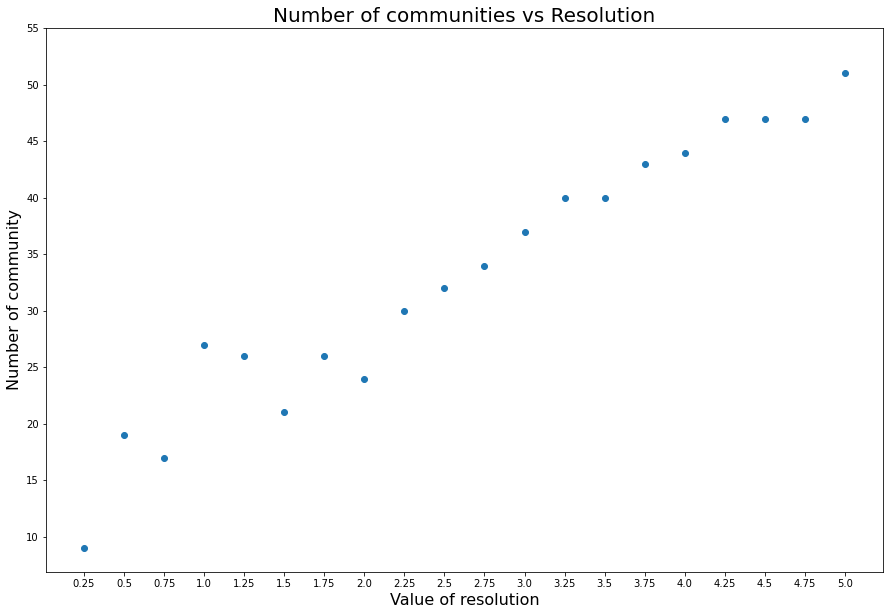

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x,test)
ax.set_xticks([i+1 for i in range(20)])
ax.set_yticks([i for i in range(10,60,5)])
ax.set_xticklabels(step)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Number of community',fontsize=16)
ax.set_title('Number of communities vs Resolution',fontsize=20)
plt.savefig('number of community vs resolution in greedy modularity communities algo.png',dpi=300)

### The above plot showing the upward trend in number of community as the value of resolution increase


In [67]:
import skbio 

/home/sunny/anaconda3/lib/python3.7/site-packages/skbio/util/_testing.py:23: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


## Simpson evenness index 

In [72]:
1-skbio.diversity.alpha.simpson([2,2,2,2,2,2,2])

0.1428571428571428

In [73]:
1-skbio.diversity.alpha.simpson([1,1,1,1,1,1,8])

0.3571428571428571

In [74]:
test=[]
for i,j in enumerate(step):
    c = greedy_modularity_communities(H,weight='efreq',resolution=j)
    test.append([len(k) for k in c])

In [75]:
len(test)

20

In [81]:
simp=[1-skbio.diversity.alpha.simpson(i) for i in test]

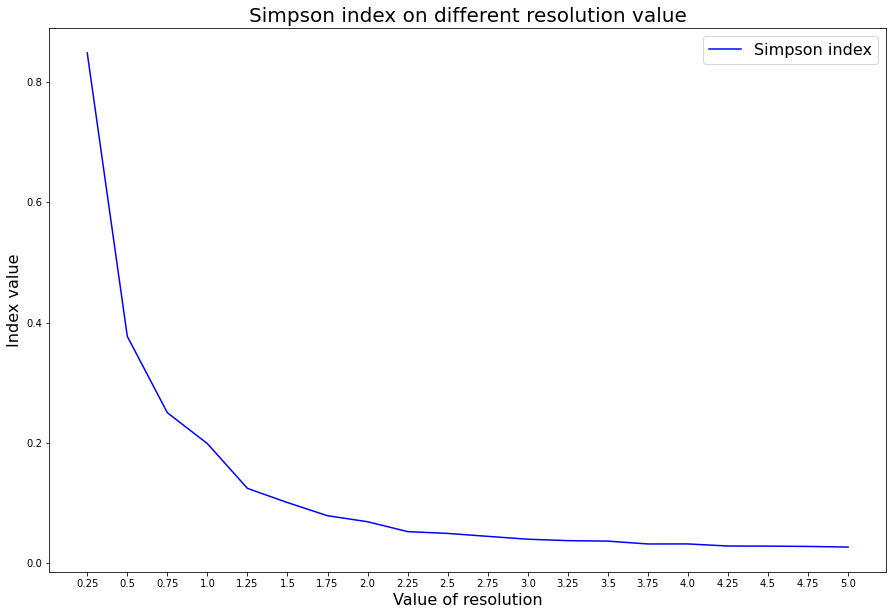

In [150]:
#fig, ax = plt.subplots(figsize=(15, 10))
#ax.scatter([i+1 for i in range(20)],simp)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i+1 for i in range(20)],simp,label='Simpson index',color='blue')
ax.set_xticks([i+1 for i in range(20)])
ax.set_xticklabels(step)
ax.legend(fontsize=16)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Index value',fontsize=16)
ax.set_title('Simpson index on different resolution value',fontsize=20)
plt.savefig('Simpson index on different resolution value.png',dpi=300)

## Coefficient of Variation

### it is st. dev divided by mean 

In [84]:
cv=[np.std(i)/np.mean(i)  for i in test]

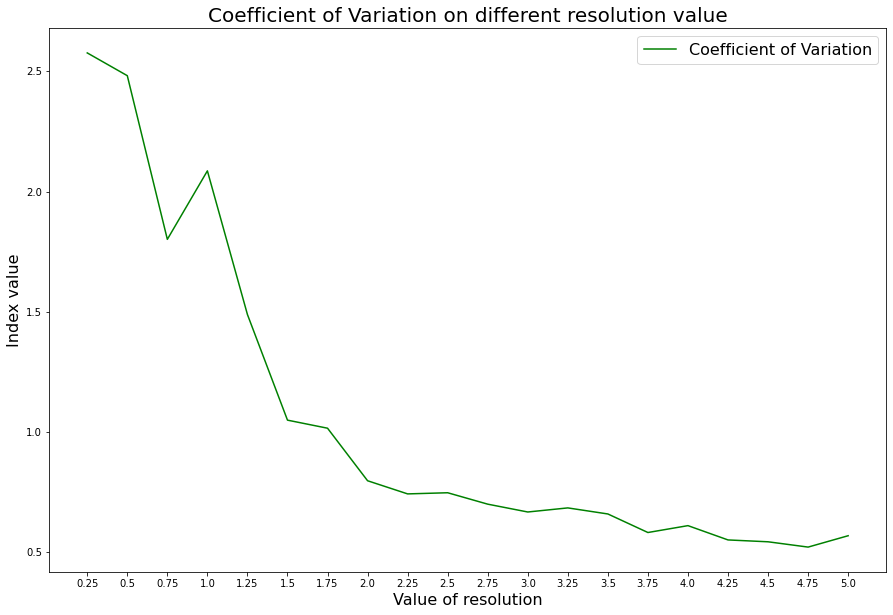

In [149]:
#fig, ax = plt.subplots(figsize=(15, 10))
#ax.scatter([i+1 for i in range(20)],cv)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i+1 for i in range(20)],cv,label='Coefficient of Variation',color='green')
ax.set_xticks([i+1 for i in range(20)])
ax.set_xticklabels(step)
ax.legend(fontsize=16)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Index value',fontsize=16)
ax.set_title('Coefficient of Variation on different resolution value',fontsize=20)
plt.savefig('Coefficient of Variation on different resolution value.png',dpi=300)

## Shannon–Wiener Diversity Index

In [87]:
skbio.diversity.alpha.shannon([2,2,2,2,2,2,2],base=np.e)

1.945910149055313

In [89]:
shan=[-skbio.diversity.alpha.shannon(i,base=np.e) for i in test]

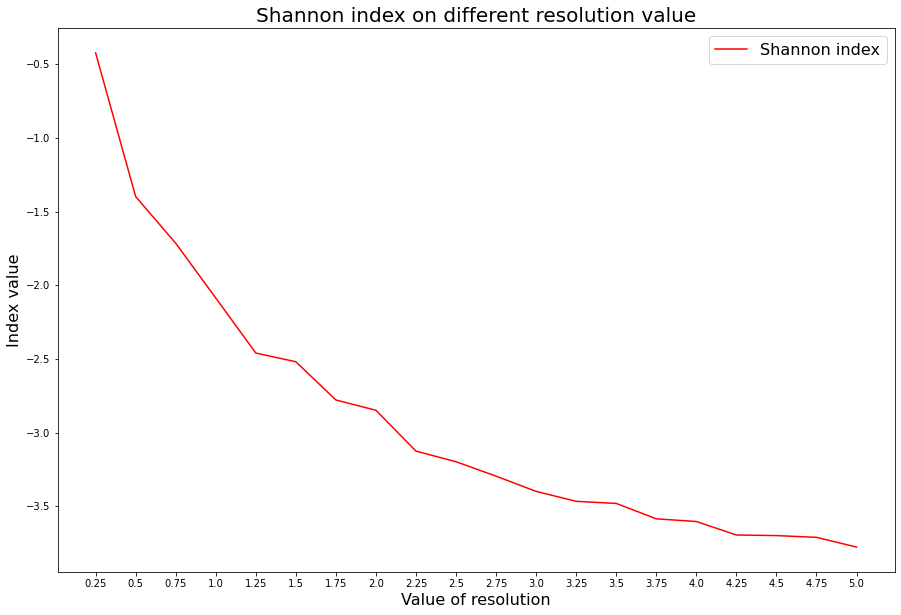

In [148]:
#fig, ax = plt.subplots(figsize=(15, 10))
#ax.scatter([i+1 for i in range(20)],shan)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i+1 for i in range(20)],shan,label='Shannon index',color='red')
ax.set_xticks([i+1 for i in range(20)])
ax.set_xticklabels(step)
ax.legend(fontsize=16)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Index value',fontsize=16)
ax.set_title('Shannon index on different resolution value',fontsize=20)
plt.savefig('Shannon index on different resolution value.png',dpi=300)

## Pielou Index

In [94]:
pielou=[-skbio.diversity.alpha.shannon(i,base=np.e)/np.log(len(i)) for i in test]

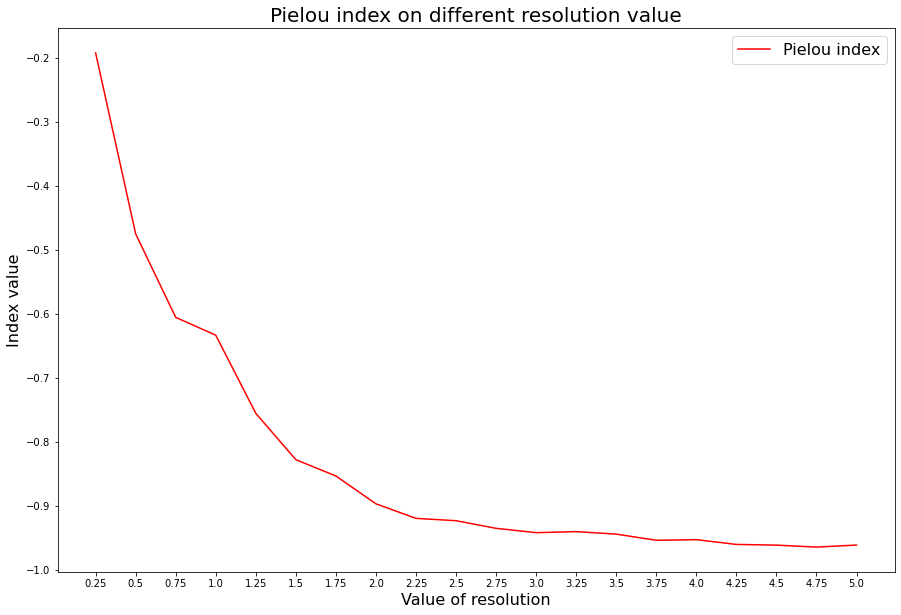

In [147]:
#fig, ax = plt.subplots(figsize=(15, 10))
#ax.scatter([i+1 for i in range(20)],pielou)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i+1 for i in range(20)],pielou,label='Pielou index',color='red')
ax.set_xticks([i+1 for i in range(20)])
ax.set_xticklabels(step)
ax.legend(fontsize=16)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Index value',fontsize=16)
ax.set_title('Pielou index on different resolution value',fontsize=20)
plt.savefig('Pielou index on different resolution value.png',dpi=300)

In [105]:
-skbio.diversity.alpha.shannon([2,2,2,2,2,2,2],base=np.e)/np.log(20)

-0.6495607655709433

In [119]:
skbio.diversity.alpha.shannon([2,2,2,2,2,2,2],base=np.e)/7

0.277987164150759

In [118]:
skbio.diversity.alpha.shannon([1,1,1,1,1,1,8],base=np.e)/7

0.20725786001198915

In [108]:
1.94/np.log(8)

0.9329427931081964

In [110]:
np.log(7)

1.9459101490553132

In [112]:
1.945910149055313/.278

6.999676795162996

In [114]:
np.e**7

1096.6331584284583

In [117]:
np.log(1096)

6.99942246750796

### THERE is some issue with pielou index calculation as formula say logS but value corresponds to divide by S only 

In [120]:

##

## Gini index 

In [123]:
skbio.diversity.alpha.gini_index([2,2,2,2,2,2,2],method='trapezoids')

0.0

In [124]:
skbio.diversity.alpha.gini_index([1,1,1,1,1,1,8],method='trapezoids')

0.4285714285714286

In [125]:
gini=[skbio.diversity.alpha.gini_index(i,method='trapezoids') for i in test]

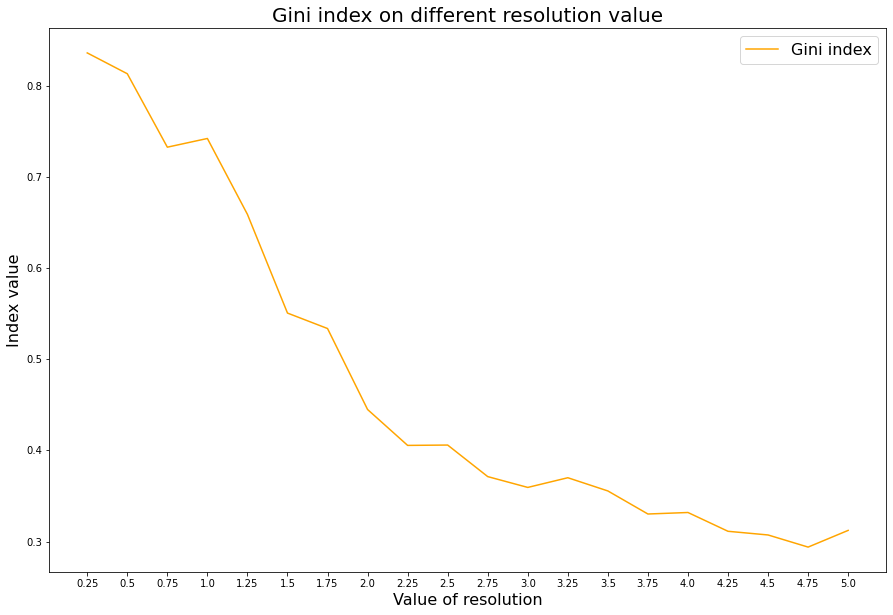

In [146]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i+1 for i in range(20)],gini,label='Gini index',color='orange')
ax.set_xticks([i+1 for i in range(20)])
ax.set_xticklabels(step)
ax.legend(fontsize=16)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Index value',fontsize=16)
ax.set_title('Gini index on different resolution value',fontsize=20)
plt.savefig('Gini index on different resolution value.png',dpi=300)

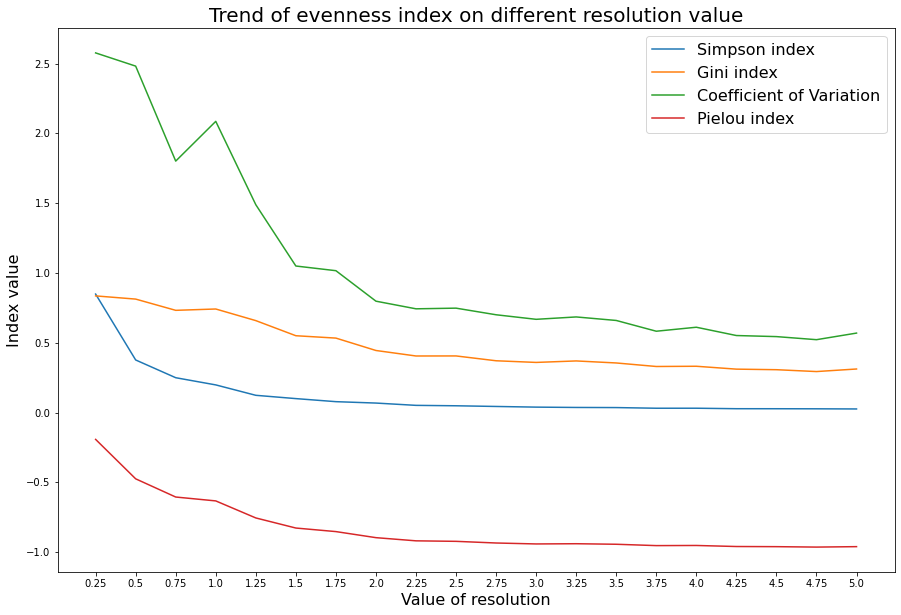

In [144]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i+1 for i in range(20)],simp, label='Simpson index')
ax.plot([i+1 for i in range(20)],gini, label='Gini index')
#ax.plot([i+1 for i in range(20)],shan)
ax.plot([i+1 for i in range(20)],cv, label='Coefficient of Variation')
ax.plot([i+1 for i in range(20)],pielou, label='Pielou index')
ax.set_xticks([i+1 for i in range(20)])
ax.set_xticklabels(step)
ax.legend(fontsize=16)
ax.set_xlabel('Value of resolution',fontsize=16)
ax.set_ylabel('Index value',fontsize=16)
ax.set_title('Trend of evenness index on different resolution value',fontsize=20)
plt.savefig('Trend of evenness index on different resolution value.png',dpi=300)

# Sankey Diagram

In [151]:
import plotly.graph_objects as go

In [152]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [154]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

In [157]:
data['layout']

{'title': {'text': "Energy forecast for 2050, UK — Department of Energy & Climate Change<br>Imperfect copy of <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock's example</a><br>with numerous <a href='https://plotly.com/javascript/'>Plotly</a> features"},
 'width': 1118,
 'height': 772,
 'font': {'size': 10},
 'updatemenus': [{'y': 1,
   'buttons': [{'label': 'Light',
     'method': 'relayout',
     'args': ['paper_bgcolor', 'white']},
    {'label': 'Dark',
     'method': 'relayout',
     'args': ['paper_bgcolor', 'black']}]},
  {'y': 0.9,
   'buttons': [{'label': 'Thick',
     'method': 'restyle',
     'args': ['node.thickness', 15]},
    {'label': 'Thin', 'method': 'restyle', 'args': ['node.thickness', 8]}]},
  {'y': 0.8,
   'buttons': [{'label': 'Small gap',
     'method': 'restyle',
     'args': ['node.pad', 15]},
    {'label': 'Large gap', 'method': 'restyle', 'args': ['node.pad', 20]}]},
  {'y': 0.7,
   'buttons': [{'label': 'Snap',
     'method': 'restyle',
     'args': [

In [160]:
data['data']

[{'type': 'sankey',
  'domain': {'x': [0, 1], 'y': [0, 1]},
  'orientation': 'h',
  'valueformat': '.0f',
  'valuesuffix': 'TWh',
  'node': {'pad': 15,
   'thickness': 15,
   'line': {'color': 'black', 'width': 0.5},
   'label': ["Agricultural 'waste'",
    'Bio-conversion',
    'Liquid',
    'Losses',
    'Solid',
    'Gas',
    'Biofuel imports',
    'Biomass imports',
    'Coal imports',
    'Coal',
    'Coal reserves',
    'District heating',
    'Industry',
    'Heating and cooling - commercial',
    'Heating and cooling - homes',
    'Electricity grid',
    'Over generation / exports',
    'H2 conversion',
    'Road transport',
    'Agriculture',
    'Rail transport',
    'Lighting & appliances - commercial',
    'Lighting & appliances - homes',
    'Gas imports',
    'Ngas',
    'Gas reserves',
    'Thermal generation',
    'Geothermal',
    'H2',
    'Hydro',
    'International shipping',
    'Domestic aviation',
    'International aviation',
    'National navigation',
    'Mar

In [163]:
data['data'][0]['node']['label']

["Agricultural 'waste'",
 'Bio-conversion',
 'Liquid',
 'Losses',
 'Solid',
 'Gas',
 'Biofuel imports',
 'Biomass imports',
 'Coal imports',
 'Coal',
 'Coal reserves',
 'District heating',
 'Industry',
 'Heating and cooling - commercial',
 'Heating and cooling - homes',
 'Electricity grid',
 'Over generation / exports',
 'H2 conversion',
 'Road transport',
 'Agriculture',
 'Rail transport',
 'Lighting & appliances - commercial',
 'Lighting & appliances - homes',
 'Gas imports',
 'Ngas',
 'Gas reserves',
 'Thermal generation',
 'Geothermal',
 'H2',
 'Hydro',
 'International shipping',
 'Domestic aviation',
 'International aviation',
 'National navigation',
 'Marine algae',
 'Nuclear',
 'Oil imports',
 'Oil',
 'Oil reserves',
 'Other waste',
 'Pumped heat',
 'Solar PV',
 'Solar Thermal',
 'Solar',
 'Tidal',
 'UK land based bioenergy',
 'Wave',
 'Wind']

In [164]:
data['data'][0]['node']['label'].index('Thermal generation')

26

In [178]:
[data['data'][0]['node']['label'][data['data'][0]['link']['target'][i]] for i,j in enumerate(data['data'][0]['link']['source']) if j==26]

['Electricity grid', 'Losses', 'District heating']

In [182]:
collections.Counter(data['data'][0]['link']['source'])

Counter({0: 1,
         1: 4,
         6: 1,
         7: 1,
         8: 1,
         10: 1,
         9: 1,
         11: 3,
         15: 11,
         23: 1,
         25: 1,
         5: 5,
         27: 1,
         17: 2,
         28: 1,
         29: 1,
         2: 8,
         34: 1,
         24: 1,
         35: 4,
         36: 1,
         38: 1,
         37: 1,
         39: 2,
         40: 2,
         41: 1,
         42: 1,
         43: 2,
         4: 3,
         26: 3,
         44: 1,
         45: 1,
         46: 1,
         47: 1})

In [183]:
data['data'][0]['node']['label'][15]

'Electricity grid'

In [184]:
len(data['data'][0]['node']['label'])

48

In [192]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 5,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "green"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

## Learn to make dataset for sankey

In [226]:
DG = nx.DiGraph()

In [227]:
DG.add_edges_from([(i,j) for i,j in zip(data['data'][0]['link']['source'],data['data'][0]['link']['target'])])

In [228]:
DG.number_of_nodes()

48

In [198]:
len(data['data'][0]['node']['label'])

48

In [199]:
DG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47))

In [200]:
# G.nodes[1]["room"] = 714

In [206]:
for i in DG.nodes():
    DG.nodes[i]["label"] = data['data'][0]['node']['label'][i]

In [207]:
DG.nodes(data=True)

NodeDataView({0: {'label': "Agricultural 'waste'"}, 1: {'label': 'Bio-conversion'}, 2: {'label': 'Liquid'}, 3: {'label': 'Losses'}, 4: {'label': 'Solid'}, 5: {'label': 'Gas'}, 6: {'label': 'Biofuel imports'}, 7: {'label': 'Biomass imports'}, 8: {'label': 'Coal imports'}, 9: {'label': 'Coal'}, 10: {'label': 'Coal reserves'}, 11: {'label': 'District heating'}, 12: {'label': 'Industry'}, 13: {'label': 'Heating and cooling - commercial'}, 14: {'label': 'Heating and cooling - homes'}, 15: {'label': 'Electricity grid'}, 16: {'label': 'Over generation / exports'}, 17: {'label': 'H2 conversion'}, 18: {'label': 'Road transport'}, 19: {'label': 'Agriculture'}, 20: {'label': 'Rail transport'}, 21: {'label': 'Lighting & appliances - commercial'}, 22: {'label': 'Lighting & appliances - homes'}, 23: {'label': 'Gas imports'}, 24: {'label': 'Ngas'}, 25: {'label': 'Gas reserves'}, 26: {'label': 'Thermal generation'}, 27: {'label': 'Geothermal'}, 28: {'label': 'H2'}, 29: {'label': 'Hydro'}, 30: {'label'

In [219]:
len(data['data'][0]['link']['value'])

71

In [229]:
len(DG.edges())

68

In [222]:
len(data['data'][0]['link']['source'])

71

In [223]:
len(data['data'][0]['link']['target'])

71

In [225]:
len([(i,j)for i,j in zip(data['data'][0]['link']['source'],data['data'][0]['link']['target'])])

71

In [230]:
len(set([(i,j)for i,j in zip(data['data'][0]['link']['source'],data['data'][0]['link']['target'])]))

68

In [231]:
collections.Counter([(i,j)for i,j in zip(data['data'][0]['link']['source'],data['data'][0]['link']['target'])])

Counter({(0, 1): 1,
         (1, 2): 1,
         (1, 3): 1,
         (1, 4): 1,
         (1, 5): 1,
         (6, 2): 1,
         (7, 4): 1,
         (8, 9): 1,
         (10, 9): 1,
         (9, 4): 1,
         (11, 12): 1,
         (11, 13): 1,
         (11, 14): 1,
         (15, 16): 1,
         (15, 14): 1,
         (15, 17): 1,
         (15, 12): 1,
         (15, 18): 1,
         (15, 19): 1,
         (15, 13): 1,
         (15, 3): 1,
         (15, 20): 1,
         (15, 21): 1,
         (15, 22): 1,
         (23, 24): 1,
         (25, 24): 1,
         (5, 13): 1,
         (5, 3): 1,
         (5, 26): 1,
         (5, 19): 1,
         (5, 12): 1,
         (27, 15): 1,
         (17, 28): 1,
         (17, 3): 1,
         (28, 18): 1,
         (29, 15): 1,
         (2, 12): 1,
         (2, 30): 1,
         (2, 18): 1,
         (2, 31): 1,
         (2, 32): 1,
         (2, 19): 1,
         (2, 33): 1,
         (2, 20): 1,
         (34, 1): 1,
         (24, 5): 1,
         (35, 26): 4,
   

In [233]:
sorted([(i,j)for i,j in zip(data['data'][0]['link']['source'],data['data'][0]['link']['target'])])

[(0, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 12),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 30),
 (2, 31),
 (2, 32),
 (2, 33),
 (4, 12),
 (4, 19),
 (4, 26),
 (5, 3),
 (5, 12),
 (5, 13),
 (5, 19),
 (5, 26),
 (6, 2),
 (7, 4),
 (8, 9),
 (9, 4),
 (10, 9),
 (11, 12),
 (11, 13),
 (11, 14),
 (15, 3),
 (15, 12),
 (15, 13),
 (15, 14),
 (15, 16),
 (15, 17),
 (15, 18),
 (15, 19),
 (15, 20),
 (15, 21),
 (15, 22),
 (17, 3),
 (17, 28),
 (23, 24),
 (24, 5),
 (25, 24),
 (26, 3),
 (26, 11),
 (26, 15),
 (27, 15),
 (28, 18),
 (29, 15),
 (34, 1),
 (35, 26),
 (35, 26),
 (35, 26),
 (35, 26),
 (36, 37),
 (37, 2),
 (38, 37),
 (39, 1),
 (39, 4),
 (40, 13),
 (40, 14),
 (41, 15),
 (42, 14),
 (43, 41),
 (43, 42),
 (44, 15),
 (45, 1),
 (46, 15),
 (47, 15)]

In [235]:
data['data'][0]['node']['label'][26]

'Thermal generation'

In [238]:
data['data'][0].keys()

dict_keys(['type', 'domain', 'orientation', 'valueformat', 'valuesuffix', 'node', 'link'])

In [240]:
data['data'][0]['domain']

{'x': [0, 1], 'y': [0, 1]}

{0: 0,
 1: 1,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 32: 3,
 33: 3,
 12: 3,
 13: 3,
 18: 3,
 19: 3,
 20: 3,
 26: 3,
 30: 3,
 31: 3,
 11: 4,
 15: 4,
 14: 5,
 16: 5,
 17: 5,
 21: 5,
 22: 5,
 28: 6}

In [246]:
data['data'][0]['node']['label']

["Agricultural 'waste'",
 'Bio-conversion',
 'Liquid',
 'Losses',
 'Solid',
 'Gas',
 'Biofuel imports',
 'Biomass imports',
 'Coal imports',
 'Coal',
 'Coal reserves',
 'District heating',
 'Industry',
 'Heating and cooling - commercial',
 'Heating and cooling - homes',
 'Electricity grid',
 'Over generation / exports',
 'H2 conversion',
 'Road transport',
 'Agriculture',
 'Rail transport',
 'Lighting & appliances - commercial',
 'Lighting & appliances - homes',
 'Gas imports',
 'Ngas',
 'Gas reserves',
 'Thermal generation',
 'Geothermal',
 'H2',
 'Hydro',
 'International shipping',
 'Domestic aviation',
 'International aviation',
 'National navigation',
 'Marine algae',
 'Nuclear',
 'Oil imports',
 'Oil',
 'Oil reserves',
 'Other waste',
 'Pumped heat',
 'Solar PV',
 'Solar Thermal',
 'Solar',
 'Tidal',
 'UK land based bioenergy',
 'Wave',
 'Wind']

In [252]:
data['data'][0]['node']['label'].index('Road transport')

18

In [247]:
list(nx.dfs_edges(DG, source=0))

[(0, 1),
 (1, 2),
 (2, 12),
 (2, 30),
 (2, 18),
 (2, 31),
 (2, 32),
 (2, 19),
 (2, 33),
 (2, 20),
 (1, 3),
 (1, 4),
 (4, 26),
 (26, 15),
 (15, 16),
 (15, 14),
 (15, 17),
 (17, 28),
 (15, 13),
 (15, 21),
 (15, 22),
 (26, 11),
 (1, 5)]

In [256]:
data['data'][0]['node']['label'][18]

'Road transport'

In [255]:
[i for i in DG.edges() if i[0]==28]

[(28, 18)]

In [257]:
list(nx.bfs_edges(DG, source=0))

[(0, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 12),
 (2, 30),
 (2, 18),
 (2, 31),
 (2, 32),
 (2, 19),
 (2, 33),
 (2, 20),
 (4, 26),
 (5, 13),
 (26, 15),
 (26, 11),
 (15, 16),
 (15, 14),
 (15, 17),
 (15, 21),
 (15, 22),
 (17, 28)]

In [259]:
[ data['data'][0]['node']['label'][i]  for i in nx.dag_longest_path(DG)]

["Agricultural 'waste'",
 'Bio-conversion',
 'Gas',
 'Thermal generation',
 'Electricity grid',
 'H2 conversion',
 'H2',
 'Road transport']

##  Generate data from author keyword cluster 

In [260]:
H.number_of_nodes()

707

In [261]:
H.number_of_edges()

1851

In [264]:
[len(i) for i in test]

[9, 19, 17, 27, 26, 21, 26, 24, 30, 32, 34, 37, 40, 40, 43, 44, 47, 47, 47, 51]

In [265]:
[len(i) for i in test]

[9, 19, 17, 27, 26, 21, 26, 24, 30, 32, 34, 37, 40, 40, 43, 44, 47, 47, 47, 51]

In [269]:
for i in test:
    s=sum(i)
    l=0
    c=0
    for j in sorted(i,reverse=True):
        if l<0.8*s:
            l+=j
            c+=1
        
    print(c,len(i))
        

1 9
2 19
3 17
5 27
7 26
8 21
10 26
11 24
16 30
17 32
19 34
21 37
22 40
23 40
25 43
26 44
28 47
28 47
29 47
31 51


In [270]:
(1/9)*100

11.11111111111111

## Overlapping barplot of number of cluster  and # of cluster constitute 80% of population  

URLError: <urlopen error [Errno 104] Connection reset by peer>

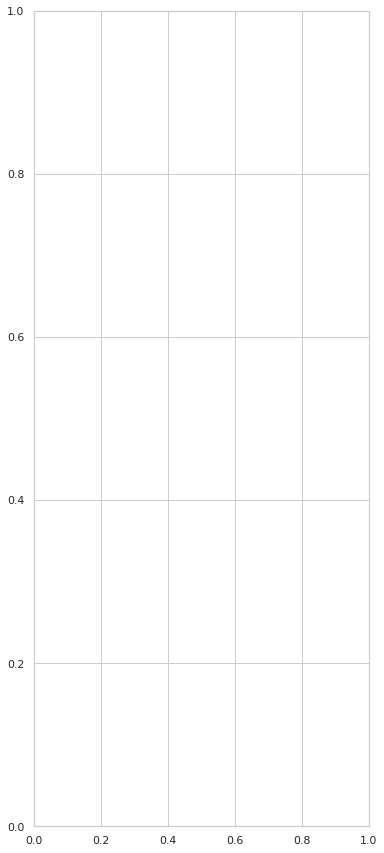

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes") #.sort_values("total", ascending=False)
"""
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
"""

In [274]:
sns.load_dataset?

In [276]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [280]:
car_crash=pd.read_csv('car_crashes.csv')

In [281]:
car_crash.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [282]:
df=pd.DataFrame(car_crash)

In [286]:
df.sort_values("total", ascending=False,inplace=True)

In [287]:
df.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   

    ins_losses abbrev  
40      116.29     SC  
34      109.72     ND  
48      152.56     WV  
3       142.39     AR  
17      137.13     KY

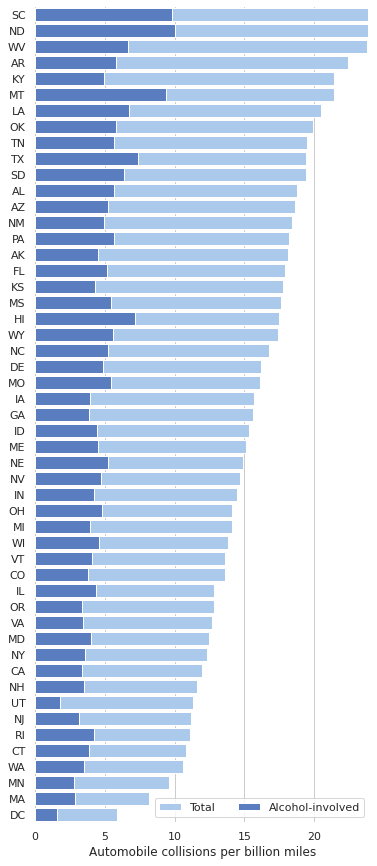

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=df,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=df,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)


### plot the # of cluster and 80% cluster size against resolution value 

In [289]:
len(test)

20

In [291]:
len(step)

20

In [292]:
c80=[]
for i in test:
    s=sum(i)
    l=0
    c=0
    for j in sorted(i,reverse=True):
        if l<0.8*s:
            l+=j
            c+=1
        
    c80.append(c)

In [294]:
len(c80)

20

In [327]:
df80=pd.DataFrame()

In [328]:
df80['resolution']=step

In [329]:
df80['total']=[len(i) for i in test]

In [330]:
df80['#80']=c80

In [332]:
df80['#65']=c65

In [333]:
df80['#50']=c50

In [334]:
df80.head()

resolution  total  #80  #65  #50
0        0.25      9    1    1    1
1        0.50     19    2    2    1
2        0.75     17    3    3    2
3        1.00     27    5    3    2
4        1.25     26    7    5    3

In [335]:
df80.sort_values("resolution", ascending=False,inplace=True)

In [336]:
df80.head()

resolution  total  #80  #65  #50
19        5.00     51   31   22   15
18        4.75     47   29   21   15
17        4.50     47   28   20   15
16        4.25     47   28   20   15
15        4.00     44   26   18   13

In [307]:
df80.resolution.astype('category')

/home/sunny/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



19    5.00
18    4.75
17    4.50
16    4.25
15    4.00
14    3.75
13    3.50
12    3.25
11    3.00
10    2.75
9     2.50
8     2.25
7     2.00
6     1.75
5     1.50
4     1.25
3     1.00
2     0.75
1     0.50
0     0.25
Name: resolution, dtype: category
Categories (20, float64): [0.25, 0.50, 0.75, 1.00, ..., 4.25, 4.50, 4.75, 5.00]

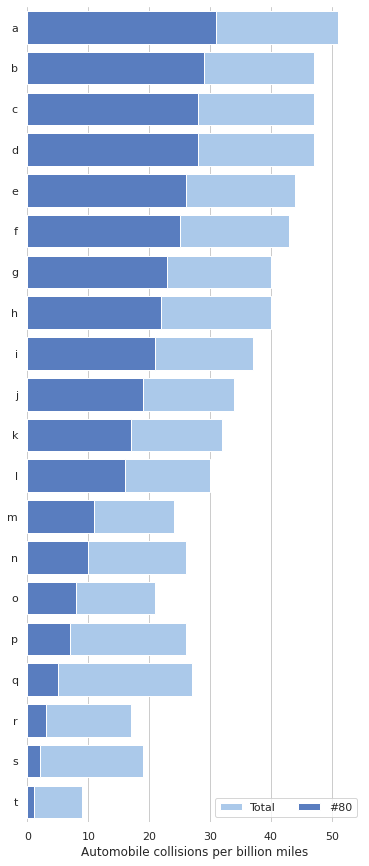

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="alphabet", data=df80,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="#80", y="alphabet", data=df80,
            label="#80", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 55), ylabel="",xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='total', ylabel='resolution'>

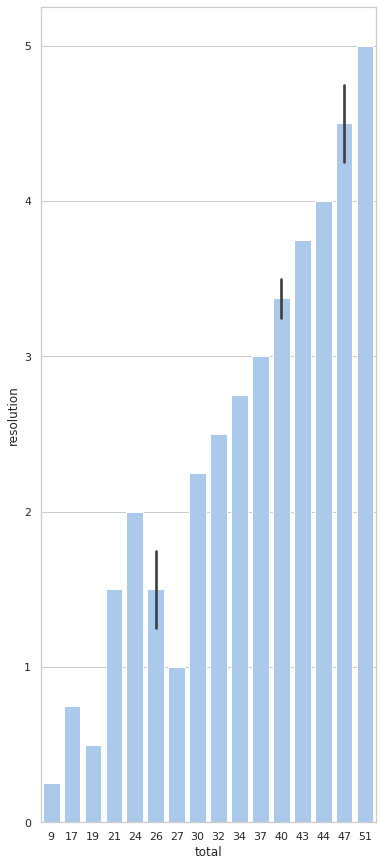

In [309]:
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="resolution", data=df80,
            label="Total", color="b")

In [310]:
import string
alphabet = list(string.ascii_lowercase)
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [338]:
df80['alphabet']=alphabet[:20]

<AxesSubplot:xlabel='total', ylabel='alphabet'>

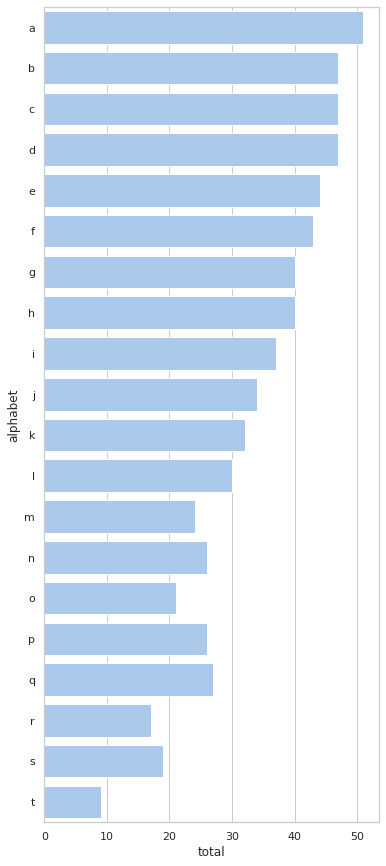

In [314]:
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="alphabet", data=df80,
            label="Total", color="b")

In [318]:
##

In [319]:
c50=[]
for i in test:
    s=sum(i)
    l=0
    c=0
    for j in sorted(i,reverse=True):
        if l<0.5*s:
            l+=j
            c+=1
        
    c50.append(c)

In [320]:
c65=[]
for i in test:
    s=sum(i)
    l=0
    c=0
    for j in sorted(i,reverse=True):
        if l<0.65*s:
            l+=j
            c+=1
        
    c65.append(c)

In [321]:
df80['#50']=c50

In [322]:
df80['#65']=c65

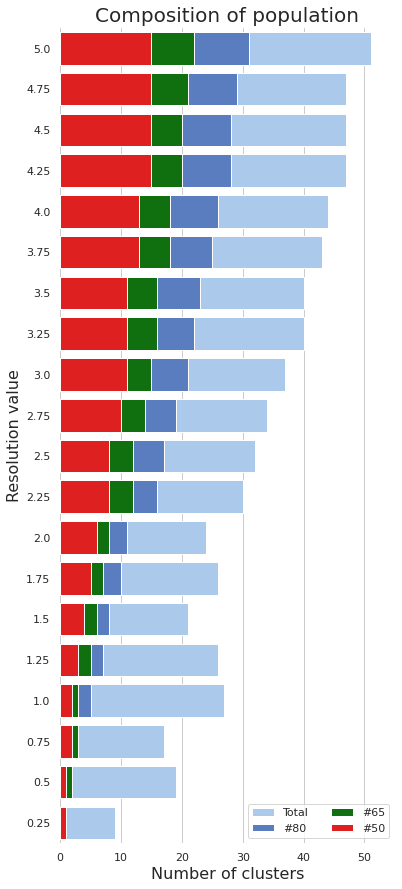

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="alphabet", data=df80,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="#80", y="alphabet", data=df80,
            label="#80", color="b")

sns.set_color_codes("muted")
sns.barplot(x="#65", y="alphabet", data=df80,
            label="#65", color="green")

sns.set_color_codes("muted")
sns.barplot(x="#50", y="alphabet", data=df80,
            label="#50", color="red")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 55))
ax.set_xlabel(xlabel="Number of clusters",fontsize=16)
sns.despine(left=True, bottom=True)
ax.set_yticks([i for i in range(20)])
ax.set_yticklabels(sorted(step,reverse=True))
ax.set_ylabel('Resolution value',fontsize=16)
ax.set_title('Composition of population' ,fontsize=20)
plt.savefig('Composition of population with resolution values.jpeg',dpi=600)

In [ ]:
ax.set_yticks([i for i in range(10,60,5)])
ax.set_xticklabels(step)

In [346]:
sorted(step,reverse=True)

[5.0,
 4.75,
 4.5,
 4.25,
 4.0,
 3.75,
 3.5,
 3.25,
 3.0,
 2.75,
 2.5,
 2.25,
 2.0,
 1.75,
 1.5,
 1.25,
 1.0,
 0.75,
 0.5,
 0.25]

In [353]:
df_percent=pd.DataFrame()

In [354]:
df80.head()

resolution  total  #80  #65  #50 alphabet
19        5.00     51   31   22   15        a
18        4.75     47   29   21   15        b
17        4.50     47   28   20   15        c
16        4.25     47   28   20   15        d
15        4.00     44   26   18   13        e

In [357]:
df80.iloc[19]['total']

9

In [361]:
c80p=[]
c65p=[]
c50p=[]
for i in range(20):
    c80p.append(df80.iloc[i]['#80']/df80.iloc[i]['total'])
    c65p.append(df80.iloc[i]['#65']/df80.iloc[i]['total'])
    c50p.append(df80.iloc[i]['#50']/df80.iloc[i]['total'])

In [363]:
ctotalp=[1 for i in range(20)]

In [364]:
df80['#80p']=c80p
df80['#65p']=c65p
df80['#50p']=c50p
df80['totalp']=ctotalp

In [365]:
df80.head()

resolution  total  #80  #65  #50 alphabet      #80p      #65p      #50p  \
19        5.00     51   31   22   15        a  0.607843  0.431373  0.294118   
18        4.75     47   29   21   15        b  0.617021  0.446809  0.319149   
17        4.50     47   28   20   15        c  0.595745  0.425532  0.319149   
16        4.25     47   28   20   15        d  0.595745  0.425532  0.319149   
15        4.00     44   26   18   13        e  0.590909  0.409091  0.295455   

    totalp  
19       1  
18       1  
17       1  
16       1  
15       1

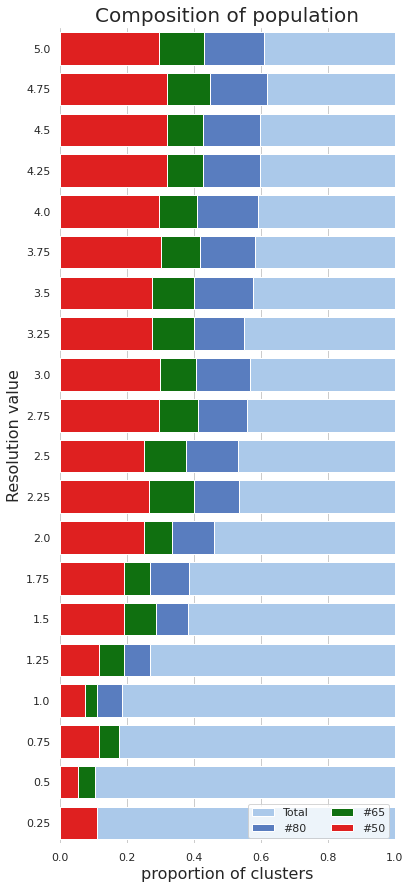

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="totalp", y="alphabet", data=df80,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="#80p", y="alphabet", data=df80,
            label="#80", color="b")

sns.set_color_codes("muted")
sns.barplot(x="#65p", y="alphabet", data=df80,
            label="#65", color="green")

sns.set_color_codes("muted")
sns.barplot(x="#50p", y="alphabet", data=df80,
            label="#50", color="red")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1))
ax.set_xlabel(xlabel="proportion of clusters",fontsize=16)
sns.despine(left=True, bottom=True)
ax.set_yticks([i for i in range(20)])
ax.set_yticklabels(sorted(step,reverse=True))
ax.set_ylabel('Resolution value',fontsize=16)
ax.set_title('Composition of population' ,fontsize=20)
plt.savefig('Composition of population with resolution values proportion.jpeg',dpi=300)

# Data  for shanky plot

In [ ]:
### based on composition plot we selected 

In [376]:
r=[0.5,0.75,1.25,1.75,2.25,4.0]

In [407]:
test=[]
for i in r:
    c = greedy_modularity_communities(H,weight='efreq',resolution=i)
    test.append(c)

In [382]:
[len(i) for i in test]

[19, 17, 26, 26, 30, 44]

In [383]:
[len(i) for i in test[0]]

[376, 213, 25, 20, 20, 10, 7, 5, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2]

In [392]:
[len(i) for i in test[1]]

[232, 222, 143, 20, 17, 15, 12, 10, 7, 6, 4, 4, 4, 3, 3, 3, 2]

In [391]:
for k,i in enumerate(test[0]):
    for l,j in enumerate(test[1]):
        if len(i) >20 and len(j)>20:
            print('cross')
            if len(set(i).intersection(set(j)))> 0.3*len(j):
                print('yes',k,l)

cross
cross
yes 0 1
cross
yes 0 2
cross
yes 1 0
cross
cross
cross
cross
cross


In [398]:
[len(i) for i in test[4]]

[68,
 63,
 58,
 41,
 37,
 36,
 34,
 32,
 31,
 31,
 27,
 27,
 26,
 26,
 26,
 24,
 20,
 17,
 15,
 10,
 9,
 9,
 9,
 7,
 5,
 5,
 4,
 4,
 3,
 3]

In [393]:
for k,i in enumerate(test[1]):
    for l,j in enumerate(test[2]):
        if len(i) >20 and len(j)>20:
            if len(set(i).intersection(set(j)))> 0.3*len(j):
                print('yes',k,l)

yes 0 0
yes 0 3
yes 1 1
yes 1 4
yes 1 6
yes 2 2
yes 2 5


In [ ]:
for k,i in enumerate(test[1]):
    for l,j in enumerate(test[2]):
        if len(i) >20 and len(j)>20:
            if len(set(i).intersection(set(j)))> 0.3*len(j):
                print('yes',k,l)

In [400]:
count=0
for i in range(len(test)):
    for j in range(i+1,len(test)):
        for k in test[i]:
            for l in test[j]:
                 if len(k) >20 and len(l)>20:
                    if len(set(k).intersection(set(l)))> 0.3*len(l):
                        count+=1
        

In [401]:
count

180

## Subgraph for selected nodes 

In [410]:
test1=H.subgraph(test[0][0])

In [412]:
test1.number_of_nodes()

376

In [413]:
test1.nodes(data=True)

NodeDataView({'organoclay': {'freq': 6}, 'cellulose and other wood products': {'freq': 3}, 'ocean': {'freq': 4}, 'elastomer': {'freq': 25}, 'nanoclay': {'freq': 10}, 'silk fibroin nanoparticles': {'freq': 2}, 'industrial ecology': {'freq': 3}, 'tissue engineering': {'freq': 33}, 'degradation': {'freq': 161}, 'food packaging': {'freq': 17}, 'flax fibers': {'freq': 6}, 'surface treatment': {'freq': 6}, 'differential scanning calorimetry (dsc)': {'freq': 6}, 'biobased': {'freq': 10}, 'soil microorganisms': {'freq': 5}, 'in vitro degradation': {'freq': 16}, 'activated sludge': {'freq': 24}, 'plasticizer': {'freq': 60}, 'bioeconomy': {'freq': 4}, 'plastics': {'freq': 120}, 'retrogradation': {'freq': 3}, 'synthesis': {'freq': 5}, 'biodegradation standard': {'freq': 3}, 'aliphatic polyesters': {'freq': 14}, 'sustainable': {'freq': 3}, 'polymer blends': {'freq': 10}, 'sludge': {'freq': 6}, 'β-tricalcium phosphate': {'freq': 4}, 'lubricants': {'freq': 2}, 'biocompatible': {'freq': 5}, 'alkali t

### Apply centrality to pick graph representative 

In [415]:
central=nx.eigenvector_centrality(test1)

In [426]:
sorted(central.items(), key=lambda item: item[1])[-5:]

[('polylactic acid', 0.22675545548816337),
 ('biodegradability', 0.2305102757496438),
 ('degradation', 0.2441980798777859),
 ('biodegradable', 0.24676974204096536),
 ('mechanical properties', 0.26469449607329754)]

In [427]:
central=nx.closeness_centrality(test1)

In [428]:
sorted(central.items(), key=lambda item: item[1])[-5:]

[('biodegradable', 0.5013368983957219),
 ('bioplastics', 0.5047106325706595),
 ('polylactic acid', 0.5047106325706595),
 ('degradation', 0.508819538670285),
 ('mechanical properties', 0.5237430167597765)]

In [429]:
central=nx.betweenness_centrality(test1)

In [430]:
sorted(central.items(), key=lambda item: item[1])[-5:]

[('polylactic acid', 0.09766626346712008),
 ('bioplastics', 0.11661130176490783),
 ('biodegradable plastic', 0.145931439702128),
 ('biodegradable', 0.1732470636641382),
 ('mechanical properties', 0.20166978255432658)]

In [434]:
central=nx.information_centrality(test1)

In [432]:
sorted(central.items(), key=lambda item: item[1])[-5:]

[('bioplastics', 0.00417500004800606),
 ('biodegradability', 0.004180093017485725),
 ('degradation', 0.0041833158297516744),
 ('mechanical properties', 0.004207215484349639),
 ('biodegradable', 0.004213462997985243)]

In [436]:
central=nx.degree_centrality(test1)

In [437]:
sorted(central.items(), key=lambda item: item[1])[-5:]

[('biodegradability', 0.16),
 ('degradation', 0.16266666666666665),
 ('biodegradable plastic', 0.17333333333333334),
 ('mechanical properties', 0.224),
 ('biodegradable', 0.23199999999999998)]

In [438]:
pr = nx.pagerank(test1)

In [439]:
sorted(pr.items(), key=lambda item: item[1])[-5:]

[('polylactic acid', 0.02385559787347696),
 ('bioplastics', 0.024593064154429807),
 ('biodegradable plastic', 0.02958601812421347),
 ('biodegradable', 0.036087147740748365),
 ('mechanical properties', 0.03692288786695068)]

## plot relationship between different centralities

In [440]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()

In [441]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

### make dataset for combine plot 

In [442]:
eigen=nx.eigenvector_centrality(test1)

In [443]:
close=nx.closeness_centrality(test1)

In [444]:
between=nx.betweenness_centrality(test1)

In [445]:
info=nx.information_centrality(test1)

In [446]:
page = nx.pagerank(test1)

In [451]:
keyword=[i for i in eigen.keys()]

In [453]:
eigen_value=[eigen[i] for i in keyword]

In [454]:
close_value=[close[i] for i in keyword]

In [455]:
between_value=[between[i] for i in keyword]

In [456]:
info_value=[info[i] for i in keyword]

In [457]:
page_value=[page[i] for i in keyword]

In [458]:
df_test1=pd.DataFrame()

In [459]:
df_test1['keyword']=keyword

In [460]:
df_test1['eigen']=eigen_value

In [461]:
df_test1['close']=close_value

In [462]:
df_test1['between']=between_value

In [463]:
df_test1['info']=info_value

In [464]:
df_test1['page']=page_value

In [465]:
df_test1.head()

keyword     eigen     close   between      info  \
0                         organoclay  0.010582  0.332742  0.000000  0.001631   
1  cellulose and other wood products  0.013631  0.334523  0.000000  0.002306   
2                              ocean  0.007689  0.323276  0.000000  0.001619   
3                          elastomer  0.074221  0.405405  0.006376  0.003723   
4                           nanoclay  0.025675  0.365497  0.000000  0.002761   

       page  
0  0.000736  
1  0.001111  
2  0.000770  
3  0.004895  
4  0.001464

In [472]:
import plotly.express as px
df = px.data.iris()
px.scatter_matrix(df_test1, dimensions=["eigen", "page", "between", "info","close"])
fig.update_traces(marker_size=10)
fig.show()

In [473]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

URLError: <urlopen error [Errno 104] Connection reset by peer>

In [474]:
data=pd.read_csv('penguins.csv')

In [475]:
df=pd.DataFrame(data)

In [476]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

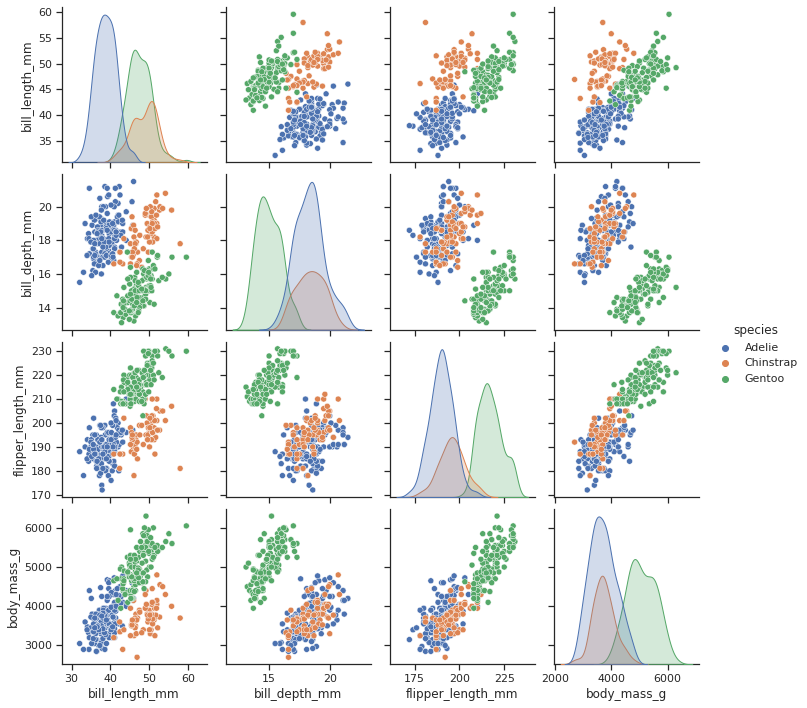

In [477]:
import seaborn as sns
sns.set_theme(style="ticks")

#df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

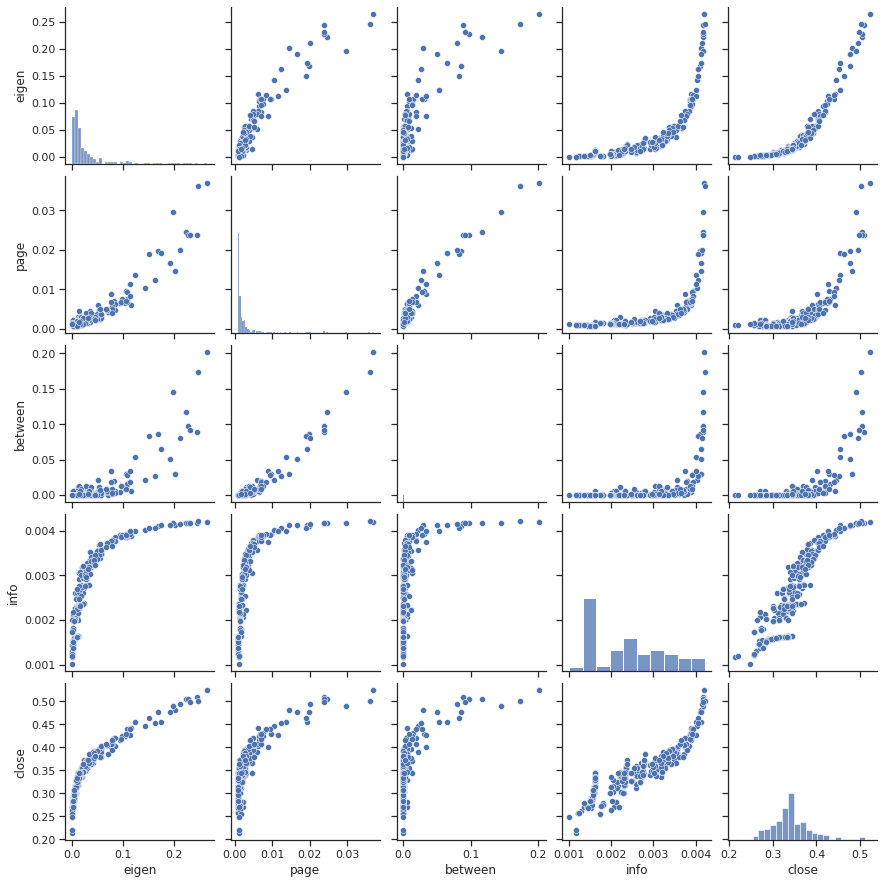

In [486]:
#f, ax = plt.subplots(figsize=(15, 15))
ax=sns.pairplot(df_test1, vars=["eigen", "page", "between", "info","close"])
ax.savefig('multi_centrality.jpeg',dpi=300)

In [480]:
sns.pairplot?

In [487]:
ls

'author keyword network curve fitting .ipynb'
 Author_keywords707.gml
 car_crashes.csv
'combine the row scopus files.ipynb'
'curve fiting Author keywords network images'/
'modularity communities  on author keyword network .ipynb'
'modularity community detection author keyword images'/
 multi_centrality.jpeg
 PassportApplicationForm_Main_English_V4.0.zip
 penguins.csv
'Trend of cluster size distribution with resolution values.png'


/home/sunny/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='between', ylabel='Density'>

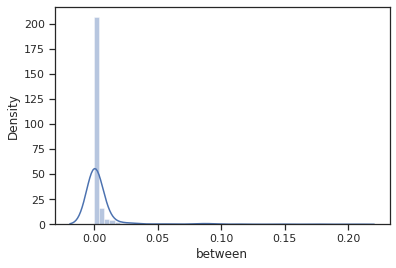

In [489]:

sns.distplot(df_test1['between'],)

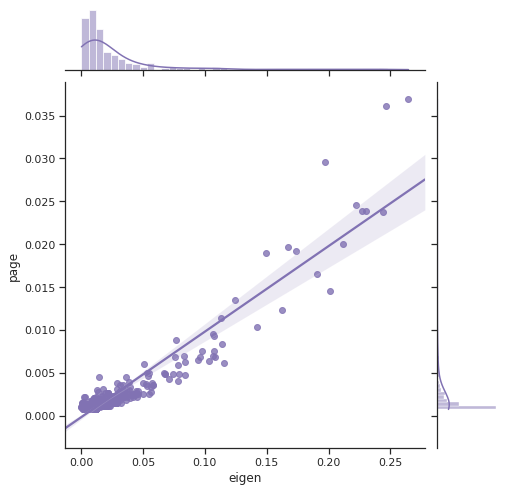

In [494]:
g = sns.jointplot(x="eigen", y="page", data=df_test1,
                  kind="reg", truncate=False,
                  color="m", height=7)
g.savefig('eigen-page.jpeg',dpi=300)

In [492]:
g.

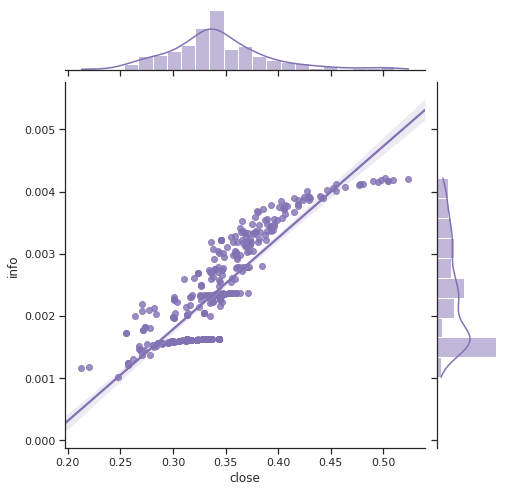

In [495]:
g = sns.jointplot(x="close", y="info", data=df_test1,
                  kind="reg", truncate=False,
                  color="m", height=7)
g.savefig('close-info.jpeg',dpi=300)

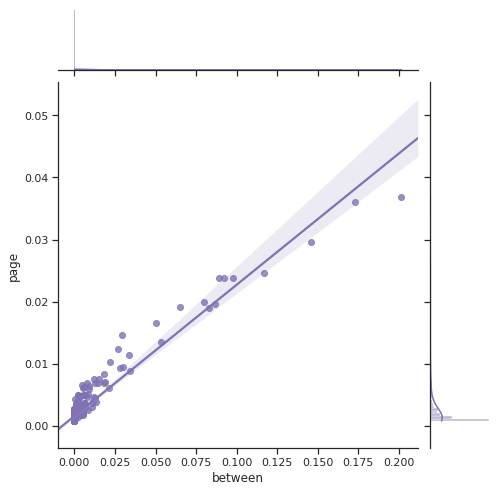

In [496]:
g = sns.jointplot(x="between", y="page", data=df_test1,
                  kind="reg", truncate=False,
                  color="m", height=7)
g.savefig('between-page.jpeg',dpi=300)

## Data for shanky

In [499]:
H.number_of_nodes()

707

In [500]:
H.number_of_edges()

1851

In [508]:
count=0
for i in range(len(test)):
    for j in range(i+1,len(test)):
        for k in test[i]:
            for l in test[j]:
                 if len(k) >20 and len(l)>20:
                    if len(set(k).intersection(set(l)))> 0.4*len(l):
                        count+=1
        

In [509]:
count

175

In [520]:
layers=[]
for i in range(len(test)):
    for j in range(i+1,len(test)):
        for k in test[i]:
            for l in test[j]:
                 if len(k) >20 and len(l)>20:
                    if len(set(k).intersection(set(l)))> 0.4*len(l):
                        test2=H.subgraph(l)
                        close1=nx.closeness_centrality(test2)
                        test3=H.subgraph(k)
                        close2=nx.closeness_centrality(test3)
                        layers.append([sorted(close1.items(), key=lambda item: item[1])[-1][0],len(close1),sorted(close2.items(), key=lambda item: item[1])[-1][0],len(close2)])
                    
                        

In [517]:
layer1=[]
for i in test[0]:
    if len(i)>20:
        test2=H.subgraph(i)
        close=nx.closeness_centrality(test2)
        layer1.append((sorted(close.items(), key=lambda item: item[1])[-1][0],len(close)))


In [518]:
layer1

[('mechanical properties', 376), ('microplastics', 213), ('dehp', 25)]

In [522]:
len(layers)

175

In [523]:
layers

[['mechanical properties', 222, 'mechanical properties', 376],
 ['biodegradable plastic', 143, 'mechanical properties', 376],
 ['microplastics', 232, 'microplastics', 213],
 ['mechanical properties', 142, 'mechanical properties', 376],
 ['biodegradable plastic', 91, 'mechanical properties', 376],
 ['biodegradability', 46, 'mechanical properties', 376],
 ['plasticizer', 43, 'mechanical properties', 376],
 ['tissue engineering', 27, 'mechanical properties', 376],
 ['microplastics', 149, 'microplastics', 213],
 ['polyethylene terephthalate (pet)', 69, 'microplastics', 213],
 ['biodegradable plastic', 81, 'mechanical properties', 376],
 ['mechanical properties', 80, 'mechanical properties', 376],
 ['plastics', 58, 'mechanical properties', 376],
 ['biodegradable', 57, 'mechanical properties', 376],
 ['poly(ε-caprolactone)', 49, 'mechanical properties', 376],
 ['kinetics', 37, 'mechanical properties', 376],
 ['biodegradability', 36, 'mechanical properties', 376],
 ['tissue engineering', 23, 

In [524]:
layers=[]
for i in range(len(test)-1):
    for k in test[i]:
            for l in test[i+1]:
                 if len(k) >20 and len(l)>20:
                    if len(set(k).intersection(set(l)))> 0.4*len(l):
                        test2=H.subgraph(l)
                        close1=nx.closeness_centrality(test2)
                        test3=H.subgraph(k)
                        close2=nx.closeness_centrality(test3)
                        layers.append([sorted(close1.items(), key=lambda item: item[1])[-1][0],len(close1),sorted(close2.items(), key=lambda item: item[1])[-1][0],len(close2)])

In [525]:
len(layers)

49

In [526]:
layers

[['mechanical properties', 222, 'mechanical properties', 376],
 ['biodegradable plastic', 143, 'mechanical properties', 376],
 ['microplastics', 232, 'microplastics', 213],
 ['microplastics', 149, 'microplastics', 232],
 ['polyethylene terephthalate (pet)', 69, 'microplastics', 232],
 ['mechanical properties', 142, 'mechanical properties', 222],
 ['biodegradability', 46, 'mechanical properties', 222],
 ['tissue engineering', 27, 'mechanical properties', 222],
 ['biodegradable plastic', 91, 'biodegradable plastic', 143],
 ['plasticizer', 43, 'biodegradable plastic', 143],
 ['microplastics', 98, 'microplastics', 149],
 ['plastics', 58, 'microplastics', 149],
 ['polyethylene', 46, 'microplastics', 149],
 ['mechanical properties', 80, 'mechanical properties', 142],
 ['biodegradable', 57, 'mechanical properties', 142],
 ['poly(ε-caprolactone)', 49, 'mechanical properties', 142],
 ['biodegradable plastic', 81, 'biodegradable plastic', 91],
 ['bioremediation', 33, 'polyethylene terephthalate 